
# <center><b>Customer Classification Analysis<b></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)
  - **4.2** [**Data Information**](#Section42)

**5.** [**Data Pre-Profiling**](#Section5)<br>
**6.** [**Data Cleaning**](#Section6)<br>
**7.** [**Data Post-Profiling**](#Section7)<br>
**8.** [**Exploratory Data Analysis**](#Section8)<br>
**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>
  - **9.2** [**Actionable Insights**](#Section92)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- This analysis for a **Retail Bank Institution**.

- This idea ia to use data to  **Classify** their **High net worth** and **Low net Worth** customer group.

- They will have to **incentivize** their customers to adopt their offering.

- One way to incentivize their customers to offer **Discounts** on the commission for trading transactions.

---
<a name = Section2></a>
# **2. Problem Statement**
---

- One issue is that only about **10% of the customers** do enough trades for earnings after discounts to be profitable.

- The company wants to figure out, which are those 10% customers so that it can selectively offer them a **discount**.

- While there was some element of **luck** involved in surviving, it seems some **groups of people** were more likely to **survive** than others.

<center><img src="https://www.callcentrehelper.com/images/stories/2007/05/pie-segment-760.jpg"></center>


<a name = Section21></a>
### **Current Scenario**

- The company rolled out this service to about 10,000+ of its customers and observed their trading behavior for 6 months and after that, they labeled them into two revenue grids 1 and 2.

---
<a name = Section3></a>
# **3. Installing and Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [1]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
#import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()                                

<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure **not to execute** the cell above (3.1) and below (3.2) again after restarting the runtime.

In [2]:
import warnings
warnings.filterwarnings('ignore')


#pd.set_option('display.max_columns', 200)
#pd.set_option('display.max_rows', 200)
#pd.reset_option('^display.', silent=True)

#### Importing the Dataset

In [3]:
data = pd.read_csv("C:/Users/ssathiyaseelan/Desktop/Python/Case Study/ML_Case Study/Project_Customer_Classification/Customer-classification/test.csv")     # Importing training dataset using pd.read_csv
data.columns


Index(['REF_NO', 'children', 'age_band', 'status', 'occupation',
       'occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area', 'Average_Credit_Card_Transaction', 'Balance_Transfer',
       'Term_Deposit', 'Life_Insurance', 'Medical_Insurance',
       'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'gender', 'region', 'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance', 'Revenue_Grid'],
      dtype='object')

In [4]:
print('Shape of the dataset:', data.shape)

Shape of the dataset: (10155, 32)


In [5]:
data.info

<bound method DataFrame.info of        REF_NO children age_band              status         occupation  \
0        5466        2    31-35             Partner       Professional   
1        9091     Zero    45-50             Partner  Secretarial/Admin   
2        9744        1    36-40             Partner      Manual Worker   
3       10700        2    31-35             Partner      Manual Worker   
4        1987     Zero    55-60             Partner          Housewife   
...       ...      ...      ...                 ...                ...   
10150    4952     Zero    41-45             Partner      Manual Worker   
10151    7348     Zero    65-70  Divorced/Separated            Retired   
10152    3903     Zero    45-50             Partner  Secretarial/Admin   
10153    4767     Zero  Unknown             Unknown            Unknown   
10154    5208        1    51-55             Partner   Business Manager   

      occupation_partner     home_status      family_income self_employed  \
0 

## 3. Preprocessing the data

- Dealing with missing values

In [6]:
data.groupby(['Revenue_Grid'])['Revenue_Grid'].count()

Revenue_Grid
1.0     860
2.0    7264
Name: Revenue_Grid, dtype: int64

In [7]:
data.Revenue_Grid.mode()

0    2.0
dtype: float64

In [8]:
data['Revenue_Grid'].mode()[0]

2.0

In [9]:
# Filling Null values of Revenue_Grid with its mode
data.Revenue_Grid = data.Revenue_Grid.fillna(data['Revenue_Grid'].mode())

- __Dropping__ columns __'Name' , 'Ticket'  , 'SibSp' , 'PassengerId' and 'Parch'__ 

In [10]:
drop_cols = ['children','age_band','family_income','status','occupation_partner','home_status','self_employed','self_employed_partner','year_last_moved','TVarea','post_code','post_area','gender','region']
data.drop(drop_cols, axis = 1, inplace=True)
data.head(10)

,REF_NO,occupation,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,Professional,26.98,29.99,312.25,299.79,88.72,108.85,175.43,134.35,8.98,55.44,7.68,151.55,81.79,136.02,360.37,2.0
1,9091,Secretarial/Admin,35.98,74.48,0.00,99.96,10.99,48.45,15.99,0.00,0.00,0.00,18.99,44.28,13.91,29.23,89.22,2.0
2,9744,Manual Worker,0.00,24.46,0.00,18.44,0.00,0.00,0.02,10.46,0.00,0.00,0.00,8.58,1.75,4.82,14.50,2.0
3,10700,Manual Worker,44.99,0.00,0.00,0.00,29.99,0.00,0.00,0.00,0.00,0.00,0.00,15.00,0.00,5.00,68.98,2.0
4,1987,Housewife,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.98,0.00,0.00,0.00,0.00,1.66,1.66,1.88,2.0
5,3309,Secretarial/Admin,9.49,0.01,0.00,0.51,55.89,0.00,28.98,0.00,0.00,0.00,0.00,13.18,4.83,14.23,33.62,2.0
6,6610,Secretarial/Admin,9.99,0.00,0.00,0.00,0.00,26.96,22.99,80.42,1.00,3.99,5.49,2.00,23.48,21.90,13.12,2.0
7,10621,Retired,0.00,0.00,0.00,0.00,0.00,0.00,0.00,29.95,0.00,0.00,0.00,0.00,4.99,4.99,15.74,2.0
8,2630,Professional,0.00,82.96,0.00,40.47,12.49,0.00,28.97,0.00,0.00,0.00,0.00,27.18,4.83,13.66,36.05,2.0
9,9356,Professional,0.00,0.00,0.00,0.00,0.00,0.00,15.99,0.00,24.47,0.00,0.00,0.00,6.74,6.74,8.60,2.0


Text(0.5, 1.0, 'Pair Plot')

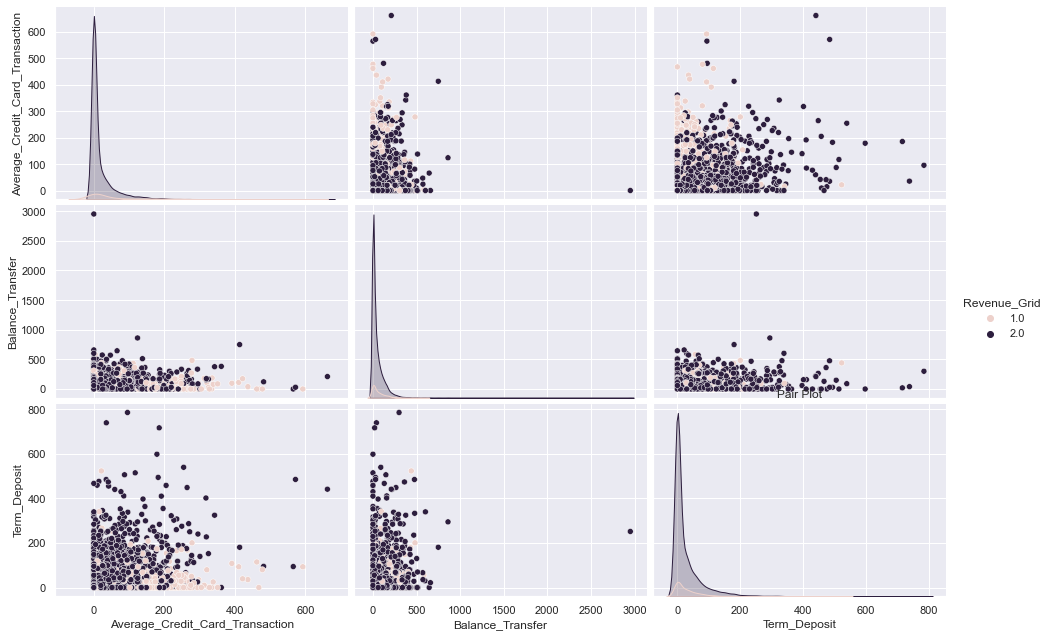

In [11]:
sns.pairplot(data[["Average_Credit_Card_Transaction","Balance_Transfer","Term_Deposit","Revenue_Grid"]],vars = ["Average_Credit_Card_Transaction","Balance_Transfer","Term_Deposit"],\
                                                             hue="Revenue_Grid", dropna=True, height = 3, aspect = 1.5)
plt.title('Pair Plot')

Text(0.5, 1.0, 'Correlation between features')

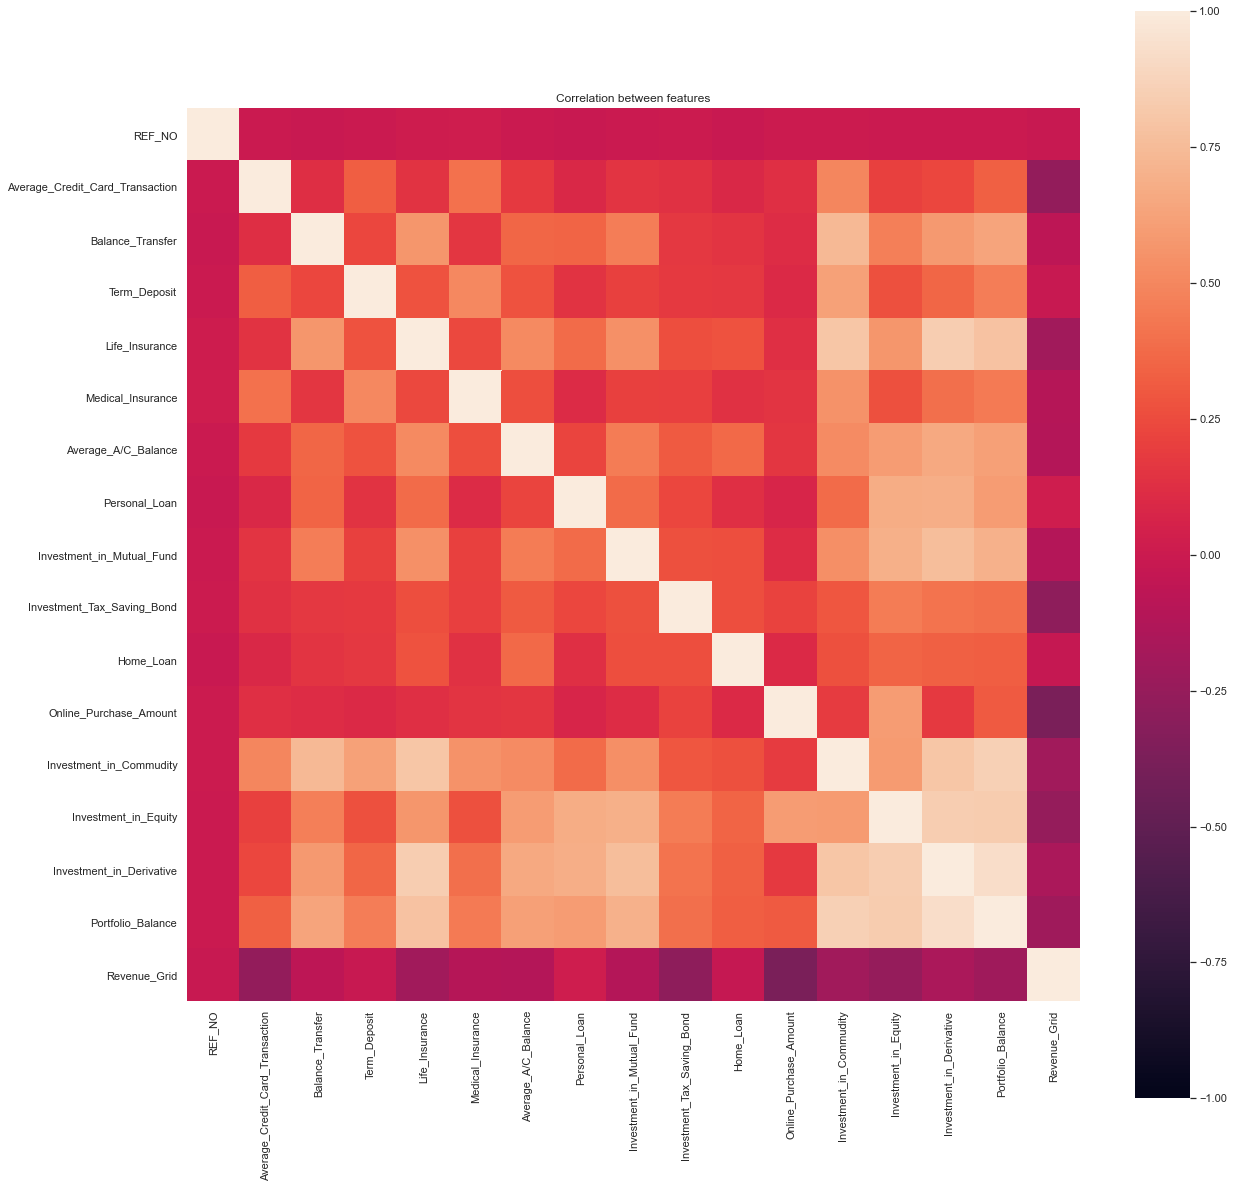

In [12]:
corr = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, square = True, annot = False,vmin=-1, vmax=1) #  vmin=-1, vmax=1
plt.title('Correlation between features')

# Creating dummy variables for our categorical variables

In [13]:
data.head()
cat_cols = ['occupation','Revenue_Grid']
data_with_dummies = pd.get_dummies(data, columns=cat_cols, drop_first=True)

Text(0.5, 1.0, 'Correlation between features')

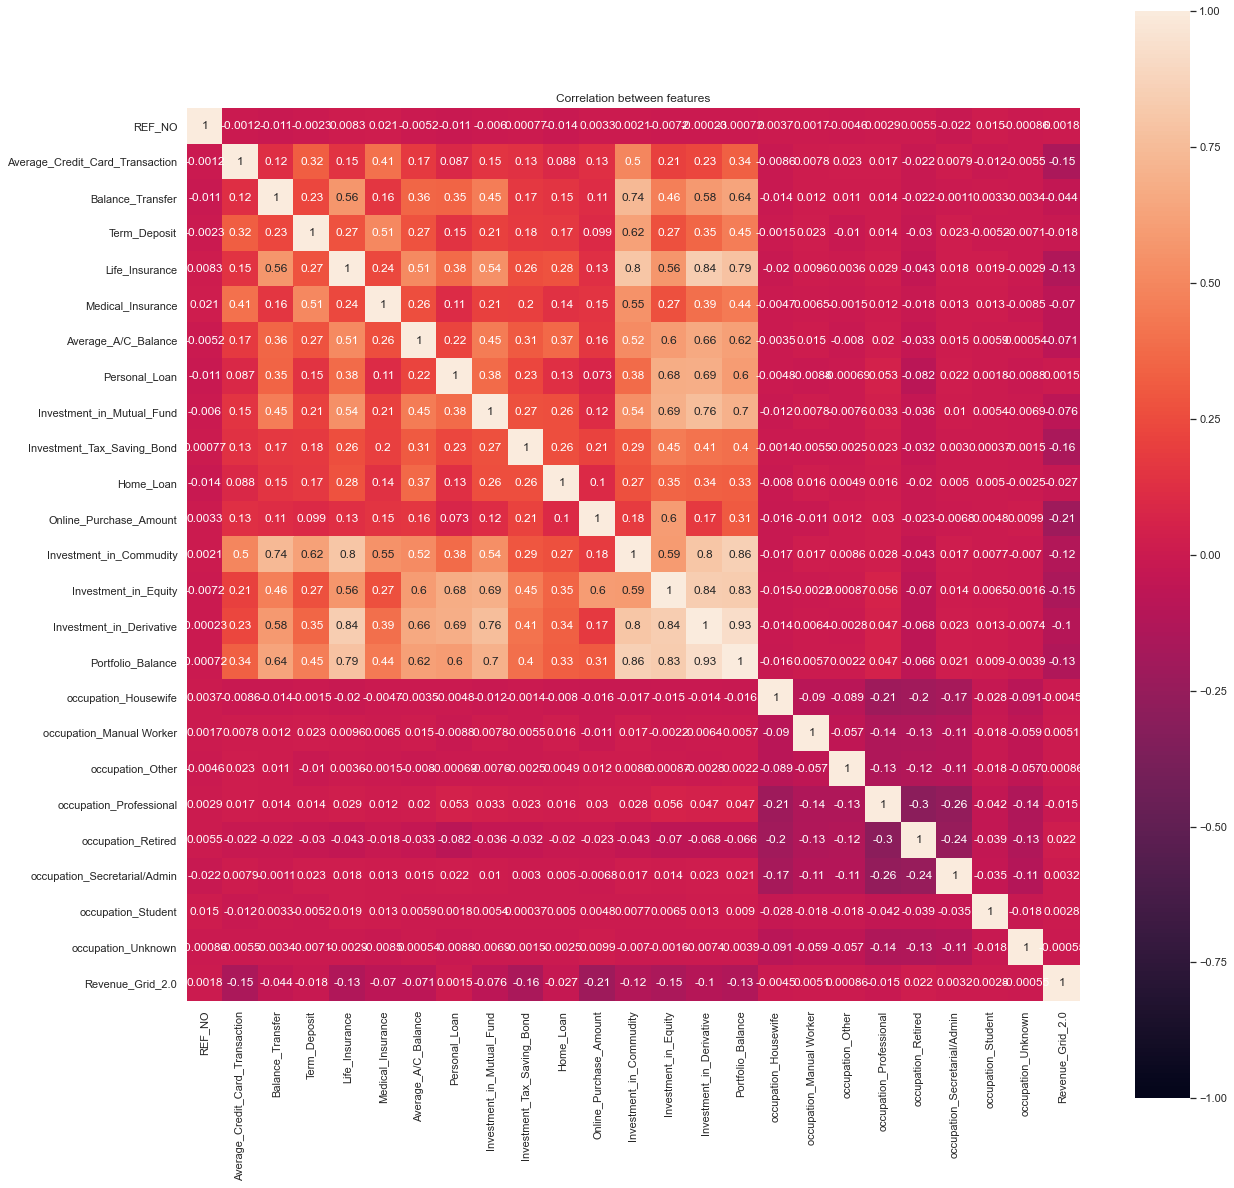

In [14]:
corr = data_with_dummies.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, square = True, annot = True,vmin=-1, vmax=1) #  vmin=-1, vmax=1
plt.title('Correlation between features')

## 4. Data Preparation for Model Training

## 4.1 Preparing X and y using pandas

In [15]:
data.head()

,REF_NO,occupation,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,Professional,26.98,29.99,312.25,299.79,88.72,108.85,175.43,134.35,8.98,55.44,7.68,151.55,81.79,136.02,360.37,2.0
1,9091,Secretarial/Admin,35.98,74.48,0.00,99.96,10.99,48.45,15.99,0.00,0.00,0.00,18.99,44.28,13.91,29.23,89.22,2.0
2,9744,Manual Worker,0.00,24.46,0.00,18.44,0.00,0.00,0.02,10.46,0.00,0.00,0.00,8.58,1.75,4.82,14.50,2.0
3,10700,Manual Worker,44.99,0.00,0.00,0.00,29.99,0.00,0.00,0.00,0.00,0.00,0.00,15.00,0.00,5.00,68.98,2.0
4,1987,Housewife,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.98,0.00,0.00,0.00,0.00,1.66,1.66,1.88,2.0


In [16]:
data_with_dummies.head()

,REF_NO,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,...,Portfolio_Balance,occupation_Housewife,occupation_Manual Worker,occupation_Other,occupation_Professional,occupation_Retired,occupation_Secretarial/Admin,occupation_Student,occupation_Unknown,Revenue_Grid_2.0
0,5466,26.98,29.99,312.25,299.79,88.72,108.85,175.43,134.35,8.98,...,360.37,0,0,0,1,0,0,0,0,1
1,9091,35.98,74.48,0.00,99.96,10.99,48.45,15.99,0.00,0.00,...,89.22,0,0,0,0,0,1,0,0,1
2,9744,0.00,24.46,0.00,18.44,0.00,0.00,0.02,10.46,0.00,...,14.50,0,1,0,0,0,0,0,0,1
3,10700,44.99,0.00,0.00,0.00,29.99,0.00,0.00,0.00,0.00,...,68.98,0,1,0,0,0,0,0,0,1
4,1987,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.98,0.00,...,1.88,1,0,0,0,0,0,0,0,1


In [17]:
data_with_dummies.columns

Index(['REF_NO', 'Average_Credit_Card_Transaction', 'Balance_Transfer',
       'Term_Deposit', 'Life_Insurance', 'Medical_Insurance',
       'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance', 'occupation_Housewife',
       'occupation_Manual Worker', 'occupation_Other',
       'occupation_Professional', 'occupation_Retired',
       'occupation_Secretarial/Admin', 'occupation_Student',
       'occupation_Unknown', 'Revenue_Grid_2.0'],
      dtype='object')

In [18]:
data.Revenue_Grid.fillna(data.Revenue_Grid.median(), inplace = True)
data.head(10)

,REF_NO,occupation,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,Professional,26.98,29.99,312.25,299.79,88.72,108.85,175.43,134.35,8.98,55.44,7.68,151.55,81.79,136.02,360.37,2.0
1,9091,Secretarial/Admin,35.98,74.48,0.00,99.96,10.99,48.45,15.99,0.00,0.00,0.00,18.99,44.28,13.91,29.23,89.22,2.0
2,9744,Manual Worker,0.00,24.46,0.00,18.44,0.00,0.00,0.02,10.46,0.00,0.00,0.00,8.58,1.75,4.82,14.50,2.0
3,10700,Manual Worker,44.99,0.00,0.00,0.00,29.99,0.00,0.00,0.00,0.00,0.00,0.00,15.00,0.00,5.00,68.98,2.0
4,1987,Housewife,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.98,0.00,0.00,0.00,0.00,1.66,1.66,1.88,2.0
5,3309,Secretarial/Admin,9.49,0.01,0.00,0.51,55.89,0.00,28.98,0.00,0.00,0.00,0.00,13.18,4.83,14.23,33.62,2.0
6,6610,Secretarial/Admin,9.99,0.00,0.00,0.00,0.00,26.96,22.99,80.42,1.00,3.99,5.49,2.00,23.48,21.90,13.12,2.0
7,10621,Retired,0.00,0.00,0.00,0.00,0.00,0.00,0.00,29.95,0.00,0.00,0.00,0.00,4.99,4.99,15.74,2.0
8,2630,Professional,0.00,82.96,0.00,40.47,12.49,0.00,28.97,0.00,0.00,0.00,0.00,27.18,4.83,13.66,36.05,2.0
9,9356,Professional,0.00,0.00,0.00,0.00,0.00,0.00,15.99,0.00,24.47,0.00,0.00,0.00,6.74,6.74,8.60,2.0


In [19]:
features = ['Average_Credit_Card_Transaction', 'Balance_Transfer', 'Term_Deposit', 'Life_Insurance','Medical_Insurance', 'Average_A/C_Balance','Personal_Loan','Investment_in_Mutual_Fund','Investment_Tax_Saving_Bond','Home_Loan','Online_Purchase_Amount','Investment_in_Commudity','Investment_in_Equity','Investment_in_Derivative','Portfolio_Balance']

target = ['Revenue_Grid']

X = data[features]
y = data[target]

## 4.2 Splitting X and y into training and test datasets

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [21]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (8124, 15)
y_train shape:  (8124, 1)

Test cases as below
X_test shape:  (2031, 15)
y_test shape:  (2031, 1)


In [22]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train);

In [23]:
print('Intercept:',logreg.intercept_)          # print the intercept 
print('Coefficients:',logreg.coef_)  

Intercept: [3.42073108]
Coefficients: [[-0.01477484  0.00396818  0.00983283 -0.0082571   0.00884361  0.00660166
   0.01705806  0.00148254 -0.05451436  0.03795746 -0.02076383  0.00093007
   0.00025874 -0.00203412 -0.00058829]]


In [24]:
X_train.columns

Index(['Average_Credit_Card_Transaction', 'Balance_Transfer', 'Term_Deposit',
       'Life_Insurance', 'Medical_Insurance', 'Average_A/C_Balance',
       'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance'],
      dtype='object')

In [25]:
(logreg.coef_).T

array([[-0.01477484],
       [ 0.00396818],
       [ 0.00983283],
       [-0.0082571 ],
       [ 0.00884361],
       [ 0.00660166],
       [ 0.01705806],
       [ 0.00148254],
       [-0.05451436],
       [ 0.03795746],
       [-0.02076383],
       [ 0.00093007],
       [ 0.00025874],
       [-0.00203412],
       [-0.00058829]])

## 5 Logistic Regression

## 5.1 Logistic regression in scikit-learn

In [26]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train);

## 5.2 Using the Model for Prediction

In [27]:
y_pred_train = logreg.predict(X_train) 
y_pred_test = logreg.predict(X_test) 

In [28]:
len(y_pred_train)

8124

In [29]:
arr = y_pred_test;
arr.shape

(2031,)

In [30]:
y_pred_test

array([2., 2., 2., ..., 2., 2., 2.])

In [31]:
pd.DataFrame(arr).to_csv("Predicted_Value.csv")